In [1]:
from code.adjustable_efficient_non_unitary import *
from qiskit.tools.visualization import *
import qiskit.quantum_info as qi
import matplotlib.pyplot as plt

Implementation of a diagonal non-unitary operator $\hat{U}_{d_t}$ with $d_t(x)=e^{-t\sin(2\pi(x-\frac{1}{2}))^2}$ and $t=100$

In [59]:
# We define the function
def d(x):
    return np.exp(-100*np.sin(2*np.pi*(x-0.5))**2)

def f(x,d,dmax):
    coef = 1
    return np.arcsin(d(x)/(coef*dmax))

In [60]:
# Return a list of the indices of the operators sorted in descending order
def get_max_coeffs(n,n_operators,f,d):
    walsh_coeffs = {}
    for i in range(2**n):
        walsh_coeffs[i] = abs(walsh_coeff_non_unitary(i,f,2**n,d))
    w = sorted(walsh_coeffs.items(), key=lambda x:x[1],reverse=True)
    list_operator_to_implement = list(dict(w).keys())[:n_operators]
    return list_operator_to_implement

In [64]:
# Number of working qubits
n = 5

# Number of ancilla qubits
n_ancilla_diag = 2

# Number of ancilla qubits for parallelization of QSP
n_ancilla_qsp = 2

# Number of operators to implement (maximum value is 2^n)
n_operators = 2**(n)

# We generate a list that contains the indices of the first n_operators operators with the highest coefficients
list_operator_to_implement = get_max_coeffs(n,n_operators,f,d)

# We generate the circuit
non_unitary_walsh = non_unitary(n,f,d,n_ancilla_diag,n_ancilla_qsp,list_operator_to_implement,decomposition='walsh',gray_code=True,swaps=True)

# Walsh circuit
q_walsh = QuantumRegister(n,name='q_walsh')
qA_walsh = QuantumRegister(1,name='qA_walsh')
a_walsh = AncillaRegister(n_ancilla_diag,name='a_walsh')
a_qsp_walsh = AncillaRegister(n_ancilla_qsp,name='a_qsp_walsh')
qc_walsh = QuantumCircuit(q_walsh,qA_walsh,a_walsh,a_qsp_walsh)

qc_walsh.h(q_walsh)
qc_walsh.append(non_unitary_walsh,qc_walsh.qubits)

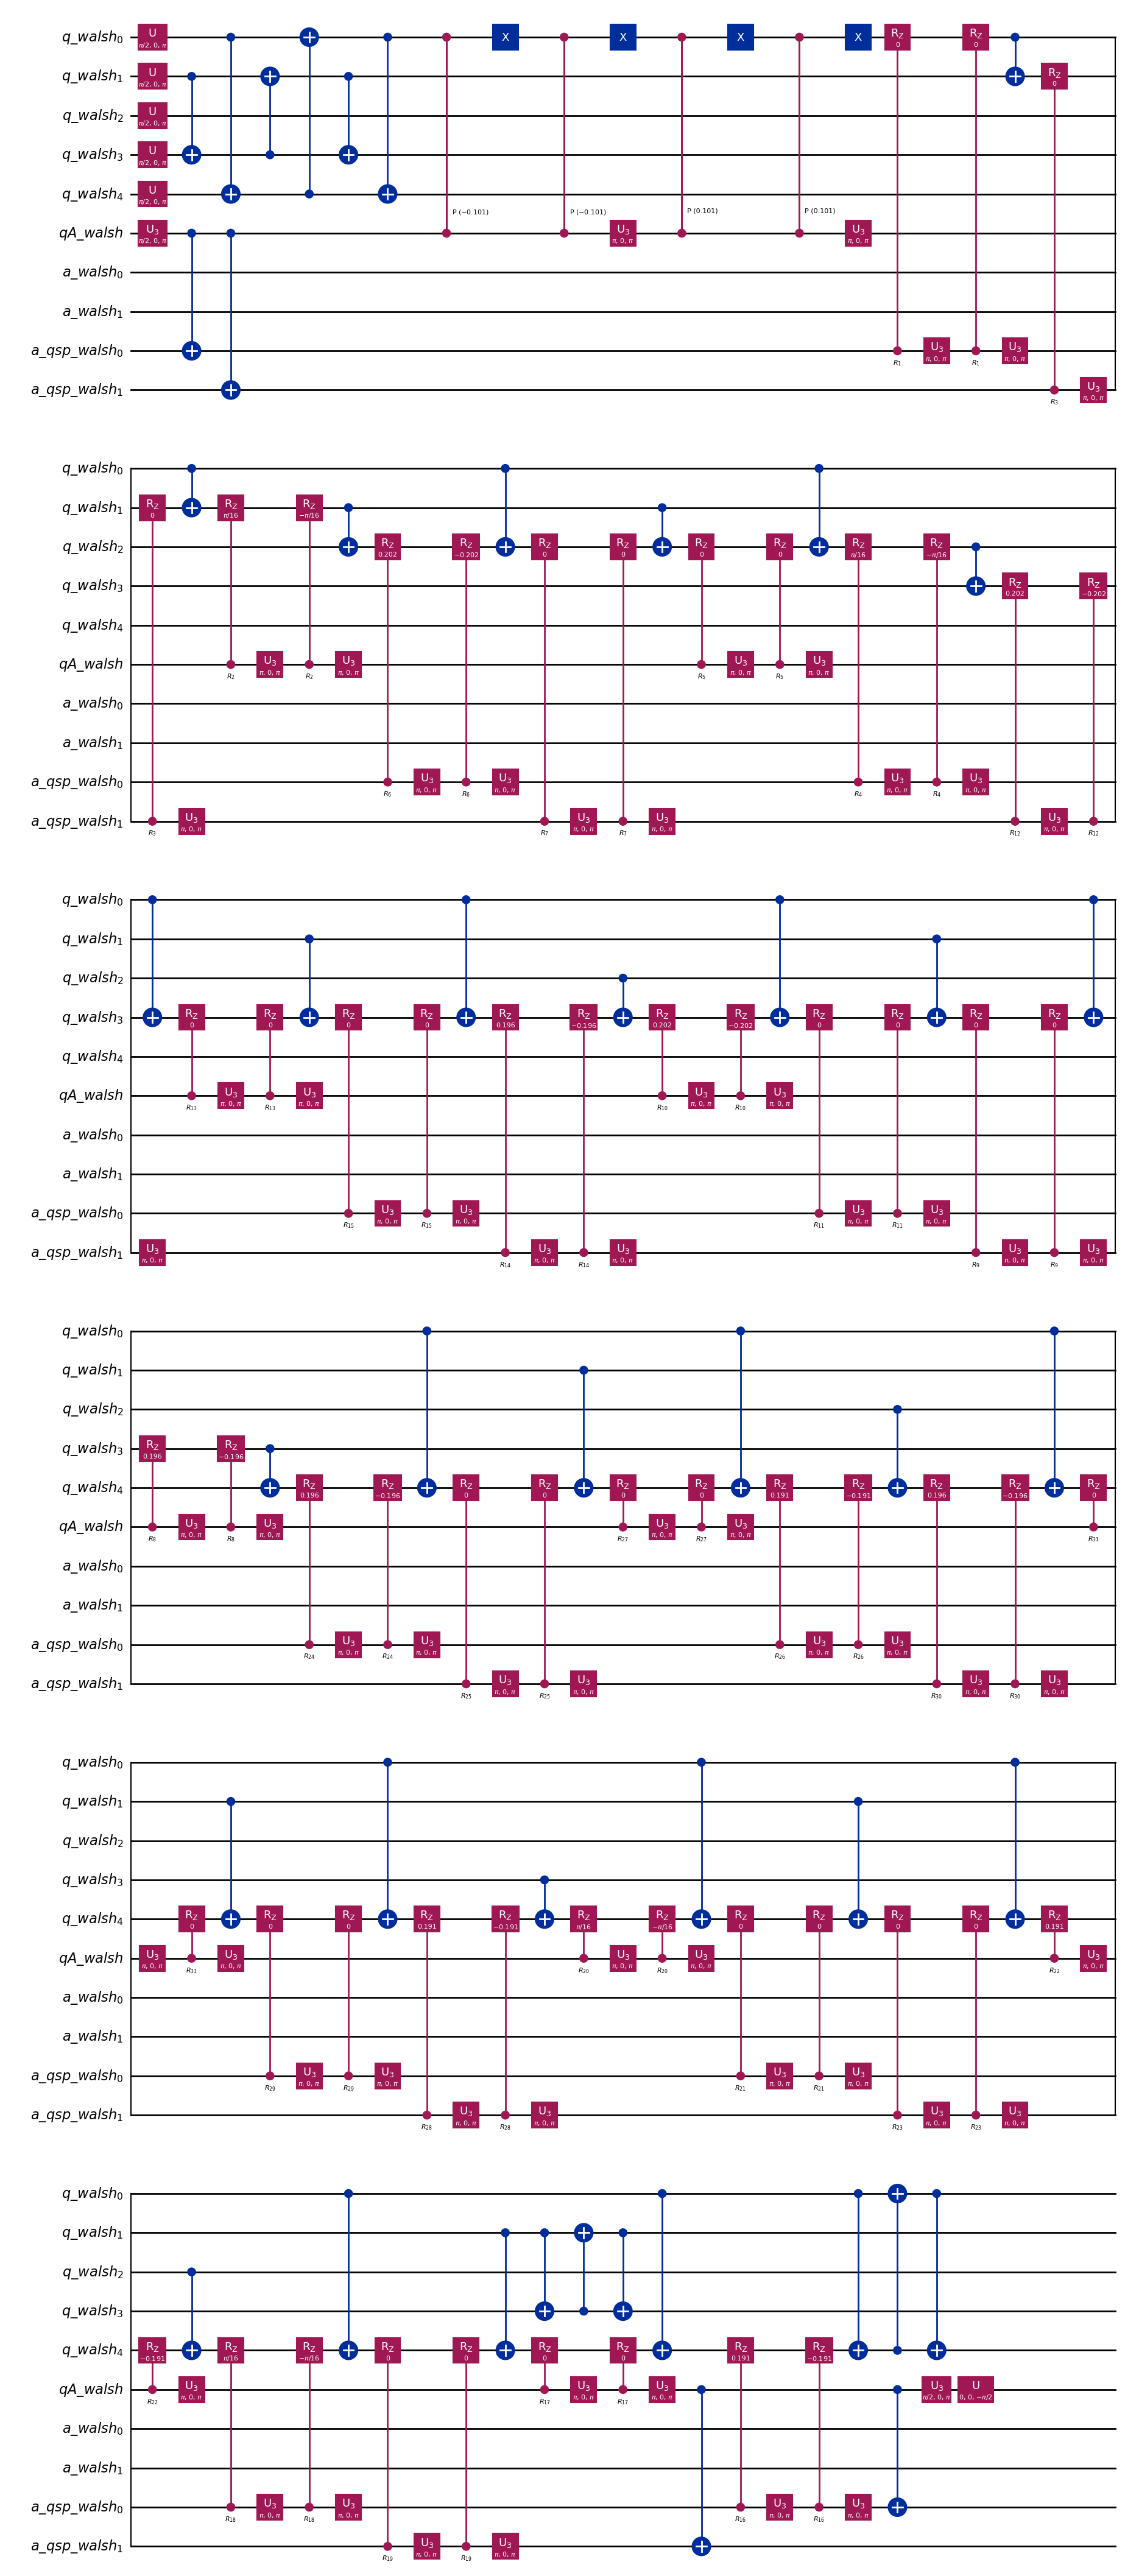

In [65]:
# We plot the circuit
qc_walsh.decompose(reps=3).draw('mpl',style='iqx')

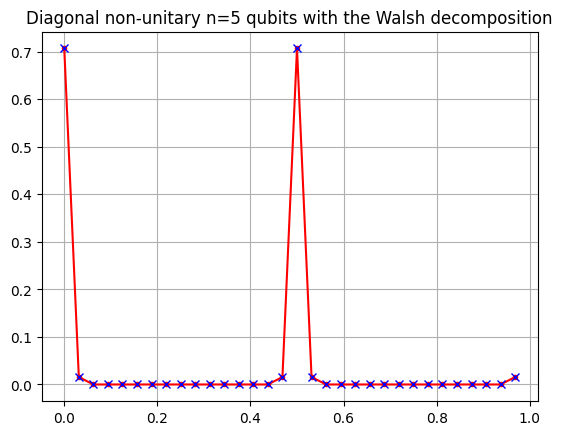

In [66]:
# We plot the results
state = qi.Statevector.from_instruction(qc_walsh)
state_dict = state.to_dict()
data = []
n_bits = len(list(state_dict.keys())[0])
for i in list(state_dict.keys()):
    if i[n_bits-n-1] == '1':
        data.append(state_dict[i])
L = np.array(data)
X = np.array(range(2**n))/(2**n)
plt.plot(X,np.real(L)/np.linalg.norm(L),marker='.',c='r')
plt.plot(X,d(X)/np.linalg.norm(d(X)),marker='x',c='b',linestyle='')
plt.title('Diagonal non-unitary n='+str(n)+' qubits with the Walsh decomposition')
plt.grid()
plt.show()